```markdown
## Importing Necessary Libraries

In this cell, we import several essential libraries for data manipulation, visualization, and machine learning. These libraries include:

- `pandas` for data manipulation and analysis.
- `numpy` for numerical operations.
- `matplotlib.pyplot` and `seaborn` for data visualization.
- `sklearn.model_selection` for splitting the dataset into training and testing sets.
- `sklearn.preprocessing` for encoding categorical variables and scaling features.
- `sklearn.linear_model` and `sklearn.ensemble` for building machine learning models.
- `sklearn.metrics` for evaluating the performance of the models.
```

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

```markdown
## Loading the Dataset

In this cell, we load the dataset containing data science salaries for the year 2024 from a CSV file. The dataset is read into a pandas DataFrame named `data`. The first few rows of the dataset are displayed using the `head()` method to give an overview of the data structure and the initial entries.
```

In [341]:
data = pd.read_csv('../data/DataScience_salaries_2024.csv')
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


```markdown
## Dataset Information

In this cell, we display the summary information of the dataset using the `info()` method. This provides an overview of the dataset, including the number of entries, column names, non-null counts, and data types for each column. This information is crucial for understanding the structure and completeness of the dataset before proceeding with further analysis and preprocessing steps.
```

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [343]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


```markdown
## Checking for Missing Values

In this cell, we check for any missing values in the dataset using the `isnull().sum()` method. This method returns the number of missing values in each column of the DataFrame. Identifying and handling missing values is a crucial step in data preprocessing, as it ensures the quality and completeness of the dataset before proceeding with further analysis and modeling.
```

In [344]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

```markdown
## Conversion of Salaries into Euros

In this cell, we convert salaries from USD to Euros using a fixed conversion rate of 0.85. A new column `salary_in_eur` is added to the DataFrame `data` to store the converted salaries. This step is essential for standardizing salaries into a single currency, making subsequent comparisons and analysis easier.

In [345]:
usd_to_eur_rate = 0.85
data['salary_in_eur'] = data['salary_in_usd'] * usd_to_eur_rate
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_eur
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,34032.30
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L,30820.15
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,30374.75
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S,65759.40
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,81078.10


```markdown
## Encoding Categorical Variables

In this cell, we encode several categorical variables in the dataset using `LabelEncoder` from the `sklearn.preprocessing` module. The variables being encoded include `experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, and `company_size`. This step is essential for converting categorical data into a numerical format that can be used in machine learning models.
```

In [346]:
label_encoder = LabelEncoder()
data['experience_level'] = label_encoder.fit_transform(data['experience_level'])
data['employment_type'] = label_encoder.fit_transform(data['employment_type'])
data['job_title'] = label_encoder.fit_transform(data['job_title'])
data['employee_residence'] = label_encoder.fit_transform(data['employee_residence'])
data['company_location'] = label_encoder.fit_transform(data['company_location'])
data['company_size'] = label_encoder.fit_transform(data['company_size'])

```markdown
## Correlation Matrix Calculation

In this cell, we calculate the correlation matrix for the numeric features in the dataset. The correlation matrix helps us understand the relationships between different numerical variables. It is computed using the `corr()` method on the DataFrame containing only numeric data. This matrix is essential for identifying potential multicollinearity issues and understanding how different features are related to each other.
```

In [347]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

```markdown
## Correlation Heatmap Visualization

In this cell, we visualize the correlation matrix calculated in the previous step using a heatmap. The heatmap is created with the `seaborn` library, which provides a clear and intuitive representation of the correlation coefficients between different numerical features in the dataset. The heatmap includes annotations for each cell, displaying the correlation values, and uses a color gradient to indicate the strength and direction of the correlations. This visualization helps in identifying highly correlated features, which can be useful for feature selection and understanding the relationships within the data.
```

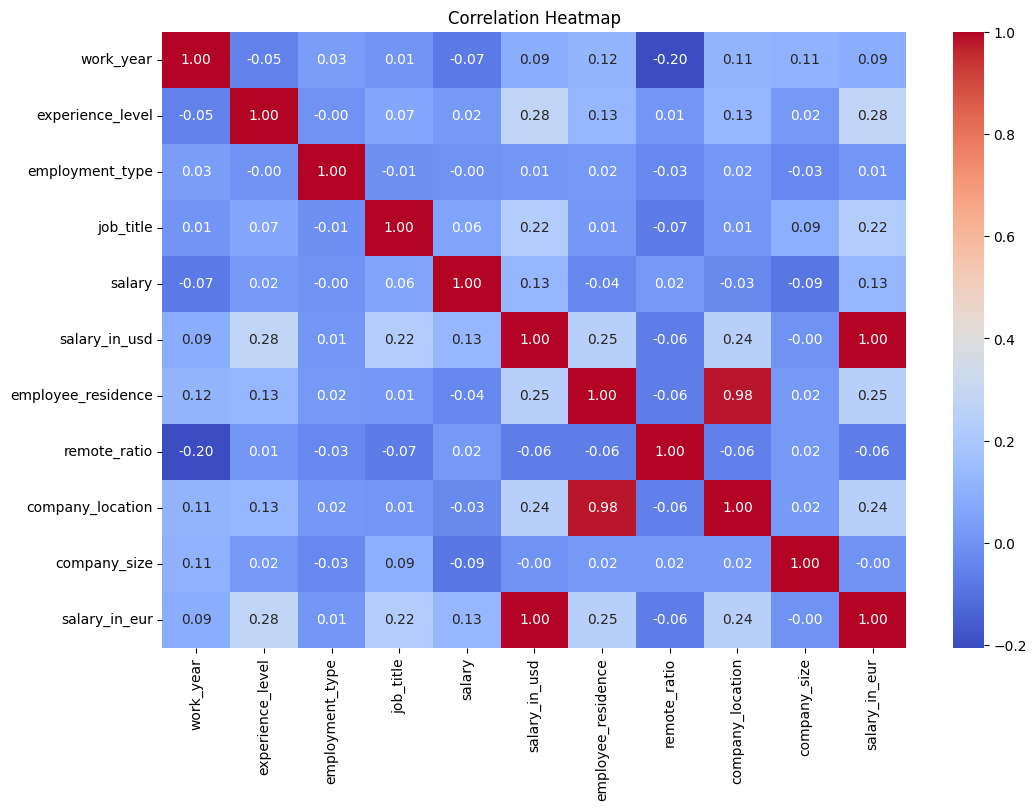

In [348]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

```markdown
## Salary Distribution

In this cell, we visualize the distribution of salaries in USD using a histogram with a kernel density estimate (KDE) overlay. The histogram provides a visual representation of the frequency distribution of salary values, while the KDE plot helps to smooth out the distribution and highlight the underlying trends. This visualization is useful for understanding the overall distribution of salaries in the dataset, identifying any potential outliers, and gaining insights into the central tendency and spread of the salary data.
```

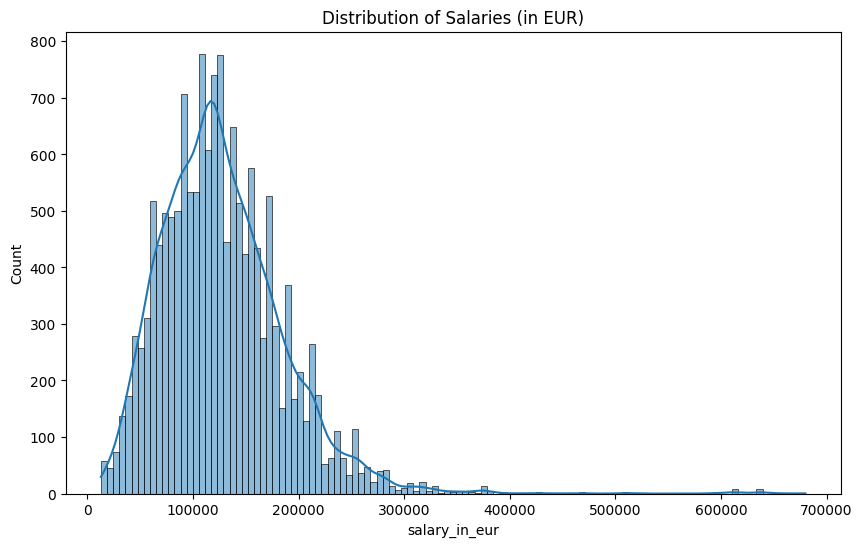

In [349]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_eur'], kde=True)
plt.title("Distribution of Salaries (in EUR)")
plt.show()

```markdown
## Salary by Experience Level

In this cell, we visualize the distribution of salaries based on experience level using a box plot. The box plot is created with the `seaborn` library, which provides a clear representation of the salary distribution for different experience levels. This visualization helps in understanding how experience level impacts salary levels, highlighting the median, quartiles, and potential outliers for each category.
```

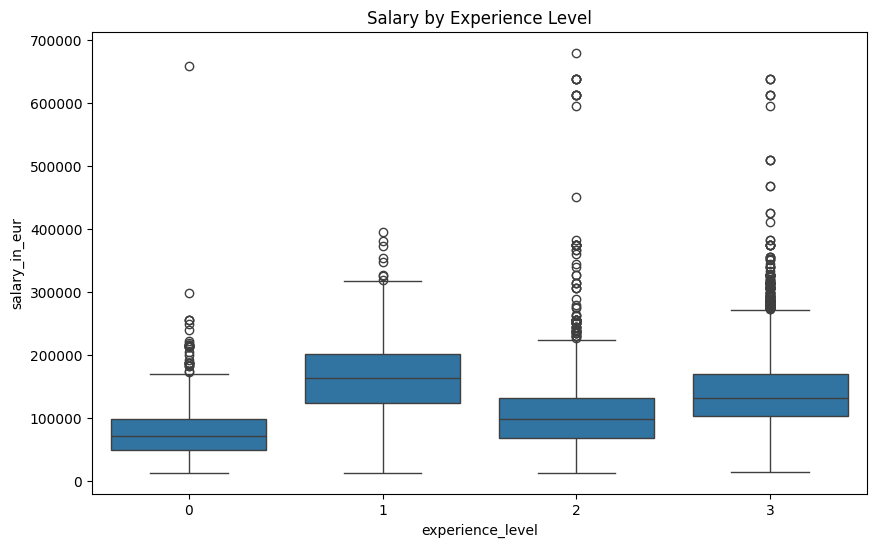

In [350]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_eur', data=data)
plt.title("Salary by Experience Level")
plt.show()

```markdown
## Salary by Company Size

In this cell, we visualize the distribution of salaries based on company size using a box plot. The box plot is created with the `seaborn` library, which provides a clear representation of the salary distribution for different company sizes. This visualization helps in understanding how company size impacts salary levels, highlighting the median, quartiles, and potential outliers for each category.
```

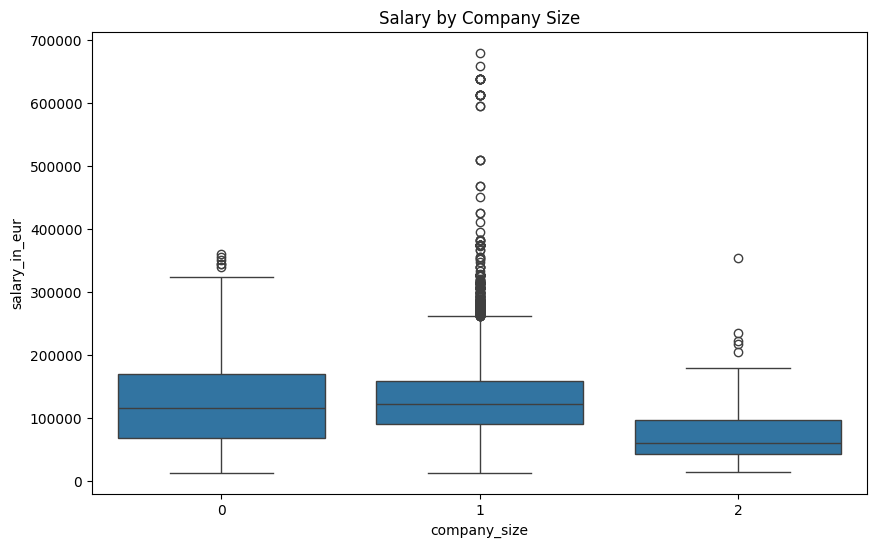

In [351]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_eur', data=data)
plt.title("Salary by Company Size")
plt.show()

```markdown
## Train-Test Split

In this cell, we split the dataset into training and testing sets. The features used for training include `experience_level`, `employment_type`, `remote_ratio`, and `company_size`, while the target variable is `salary_in_eur`. The `train_test_split` function from the `sklearn.model_selection` module is used to perform the split, with 80% of the data allocated for training and 20% for testing. A random state of 42 is set to ensure reproducibility of the results.
```

In [352]:
X = data[['experience_level', 'employment_type', 'remote_ratio', 'company_size']]
y = data['salary_in_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


```markdown
## Feature Scaling

In this cell, we scale the numeric features in the dataset using `StandardScaler` from the `sklearn.preprocessing` module. Feature scaling is an essential preprocessing step in machine learning, as it ensures that all numeric features have a similar scale, which can improve the performance of many machine learning algorithms. The `fit_transform` method is applied to the training set to compute the mean and standard deviation, and then transform the data. The `transform` method is applied to the test set to ensure that the same scaling is applied.
```

In [353]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

```markdown
## Linear Regression Model Training

In this cell, we train a Linear Regression model using the `LinearRegression` class from the `sklearn.linear_model` module. The model is trained on the scaled training data (`X_train`) and the corresponding target values (`y_train`). This step involves fitting the model to the training data, allowing it to learn the relationship between the features and the target variable (salary in USD). The trained model can then be used to make predictions on new, unseen data.
```

In [354]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

```markdown
## Model Evaluation - Linear Regression

In this cell, we evaluate the performance of the trained Linear Regression model on the test set. We use several evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 Score. These metrics provide insights into the accuracy and effectiveness of the model in predicting salaries. The results are printed to give a clear understanding of the model's performance.
```

In [355]:
predictions = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Model: {linear_model.__class__.__name__}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Model: LinearRegression
Mean Absolute Error: 41303.82135691497
Mean Squared Error: 3215726796.602788
Root Mean Squared Error: 56707.378678641
R^2 Score: 0.07209623353820915


```markdown
## Random Forest Model Training

In this cell, we train a Random Forest Regressor model using the `RandomForestRegressor` class from the `sklearn.ensemble` module. The model is trained on the scaled training data (`X_train`) and the corresponding target values (`y_train`). This step involves fitting the model to the training data, allowing it to learn the relationship between the features and the target variable (salary in USD). The trained model can then be used to make predictions on new, unseen data.
```

In [356]:
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

```markdown
## Random Forest Model Evaluation

In this cell, we evaluate the performance of the trained Random Forest Regressor model on the test set. We use several evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 Score. These metrics provide insights into the accuracy and effectiveness of the model in predicting salaries. The results are printed to give a clear understanding of the model's performance.
```

In [357]:
predictions = forest_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"Model: {forest_model.__class__.__name__}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Model: RandomForestRegressor
Mean Absolute Error: 39764.79685487357
Mean Squared Error: 3008757131.3708425
Root Mean Squared Error: 54852.13880397776
R^2 Score: 0.13181770369386558


```markdown
## Actual vs Predicted Salaries (Random Forest)

In this cell, we visualize the performance of the Random Forest Regressor model by plotting the actual salaries against the predicted salaries. The scatter plot provides a clear representation of how well the model's predictions align with the actual values. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values. This visualization helps in assessing the accuracy and reliability of the model's predictions.
```

C:\Users\perax\AppData\Local\Temp\ipykernel_14532\1756632954.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


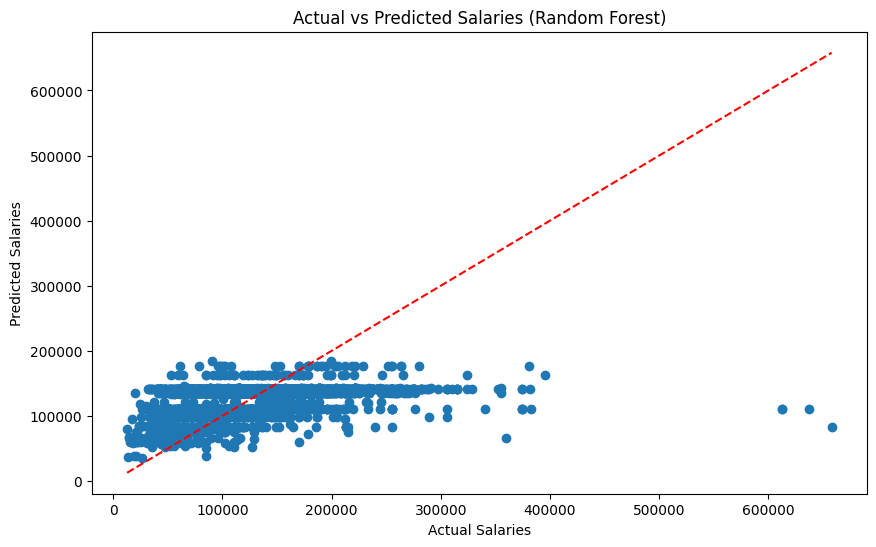

In [358]:
forest_predictions = forest_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, forest_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries (Random Forest)')
plt.show()

In [359]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Random Forest Model Training

In this cell, we train a Random Forest Regressor model using the `RandomForestRegressor` class from the `sklearn.ensemble` module. The model is trained on the scaled training data (`X_train`) and the corresponding target values (`y_train`). This step involves fitting the model to the training data, allowing it to learn the relationship between the features and the target variable (salary in USD). The trained model can then be used to make predictions on new, unseen data.

In [360]:
randomForestReg_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
randomForestReg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [361]:
y_pred = randomForestReg_model.predict(X_test)

```markdown
## Random Forest Model Evaluation

In this cell, we evaluate the performance of the trained Random Forest Regressor model on the test set. We use several evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 Score. These metrics provide insights into the accuracy and effectiveness of the model in predicting salaries. The results are printed to give a clear understanding of the model's performance.
```

In [362]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model: RandomForestRegressor")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Model: RandomForestRegressor
Mean Absolute Error: 39764.79685487357
Mean Squared Error: 3008757131.3708425
Root Mean Squared Error: 54852.13880397776
R^2 Score: 0.13181770369386558
